## Notebooks Imports

In [135]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import cm

sns.set(style = "darkgrid")

%matplotlib inline

## Gather Data



In [3]:
bostonDataset = load_boston()

In [4]:
bostonDataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

### Exploring Data

#### 1) Source of the data
#### 2) Description of the dataset
#### 3) Number of Data Points
#### 4) Number of features
#### 5) Description of features

In [5]:
bostonDataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
dir(bostonDataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [7]:
bostonDataset['filename']

'C:\\Users\\ms151\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv'

In [8]:
print(bostonDataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Data points and features

In [9]:
bostonDataset.data.shape

(506, 13)

In [10]:
bostonDataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
bostonDataset.target  # prices in thousands

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### Data Exploration with Pandas DataFrames

In [12]:
# Create a Pandas DataFrames
data = pd.DataFrame(data = bostonDataset.data, columns = bostonDataset.feature_names)

In [13]:
# Adding the column of house price into the dataframe
data['PRICE'] = bostonDataset.target

In [14]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning Data - check for missing values

In [16]:
pd.isnull(data).any()


CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising Data - Histogram, Bar Charts and Distribution

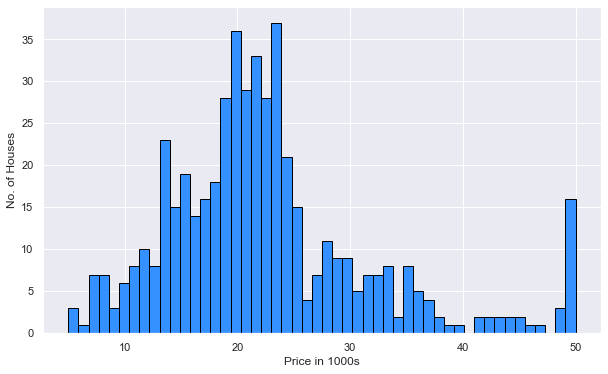

In [18]:
plt.figure(figsize=(10,6))

plt.hist(data['PRICE'], bins = 50, ec = 'black', color = '#3491ff')
plt.xlabel("Price in 1000s")
plt.ylabel("No. of Houses")

plt.show()

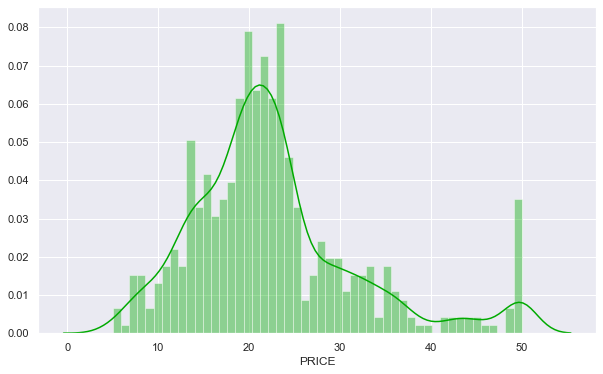

In [19]:
# Histogram of Data
plt.figure(figsize = (10,6))
sns.distplot(data['PRICE'], bins= 50, kde = True, color = "#00aa00")


plt.show()

In [20]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

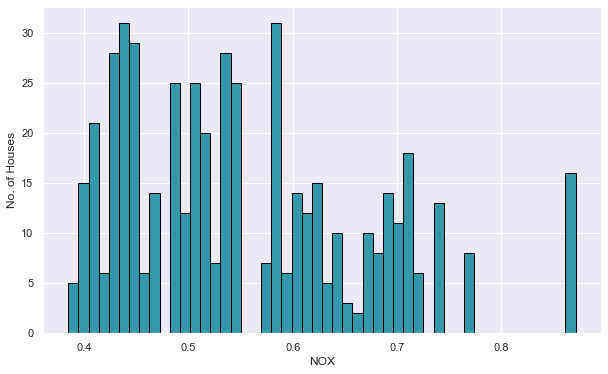

In [21]:
# Histogram of NOX
plt.figure(figsize = (10,6))
plt.hist(data['NOX'], color = "#3499aa", bins = 50, ec="black")
plt.xlabel("NOX")
plt.ylabel("No. of Houses")
plt.show()

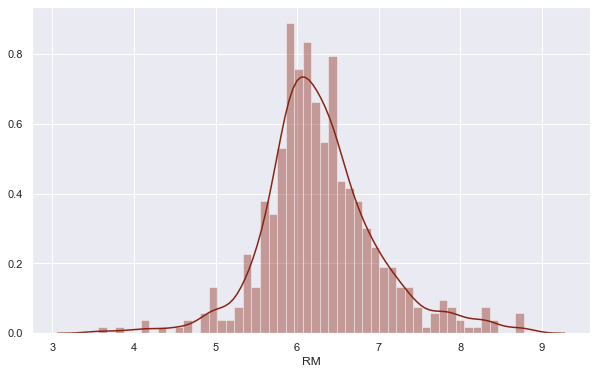

Mean:  6.284634387351787
Mode:  0    5.713
1    6.127
2    6.167
3    6.229
4    6.405
5    6.417
dtype: float64
Median:  6.2085


In [22]:
# Histogram of no. of rooms
plt.figure(figsize = (10,6))
sns.distplot(data['RM'], color = "#892311", bins=50)
plt.show()
print("Mean: ", data['RM'].mean())
print("Mode: ", data['RM'].mode())
print("Median: ", data['RM'].median())

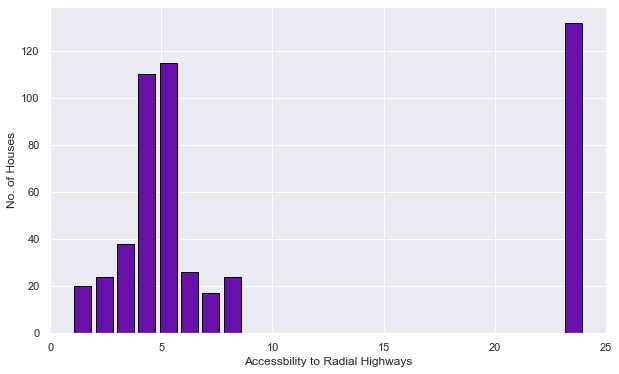

In [23]:
# Visualising RAD : index of accessibility to radial Highways
plt.figure(figsize = (10,6))
plt.hist(data['RAD'], color = "#6711aa", ec="black", bins = 24, rwidth = 0.8)
plt.xlabel("Accessbility to Radial Highways")
plt.ylabel("No. of Houses")
plt.show()

In [24]:
frequency = data['RAD'].value_counts( )

In [25]:
frequency.axes[0]

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 8.0, 2.0, 1.0, 7.0], dtype='float64')

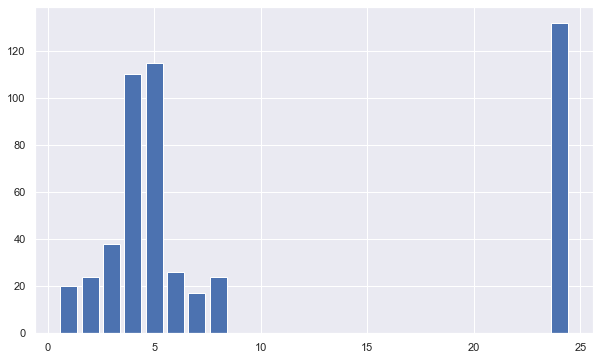

In [26]:
plt.figure(figsize = (10,6))
plt.bar(frequency.index, height = frequency)
plt.show()

In [28]:
p = pd.DataFrame({'Price':data['PRICE'],
                 'CHAS': data['CHAS']})

In [30]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive Statistics

In [32]:
data['PRICE'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

In [33]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation

## $$ \rho _{XY} = corr(X,Y)$$
## $$-1.0 \leq \rho \leq 1.0$$

In [34]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [35]:
# Correlation between property prices and no. of rooms
data['PRICE'].corr(data['RM'])

0.695359947071539

In [36]:
# Correlation between property prices and pupil teacher ratio
"""
    If Number of pupils per teacher increases, price should go down.
"""
data['PTRATIO'].corr(data['PRICE'])

-0.5077866855375615

In [37]:
data['PRICE'].corr(data['CHAS'])

0.17526017719029818

In [38]:
data.corr # Pearson Correlation Coefficients

<bound method DataFrame.corr of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   

In [39]:
mask = np.zeros_like(data.corr()) #Creating a mask for the correlation matrix
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [40]:
triangle_indices = np.triu_indices_from(mask) # to get the indices of the top tirangle

In [43]:
mask[triangle_indices] = True #setting the tirangle_indices to true
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

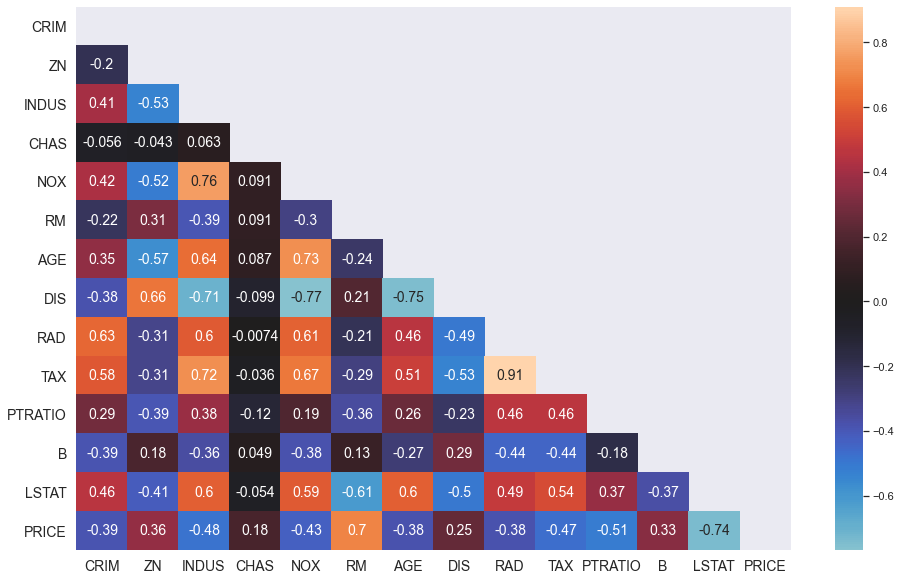

In [42]:
plt.figure(figsize = (16,10))
sns.heatmap(data.corr(), mask = mask,center = 0, annot = True, annot_kws = {"size":14})
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [44]:
# 1) have to check whether DIS adds value to regression or not
# Few things to keep in mind
# Correlation is only meaningful for continous data
# Correlation does not imply causation
# Linear Relationships only

# So it is neccessary to use this correlation data with some charts to get 
# the real meaning of this data

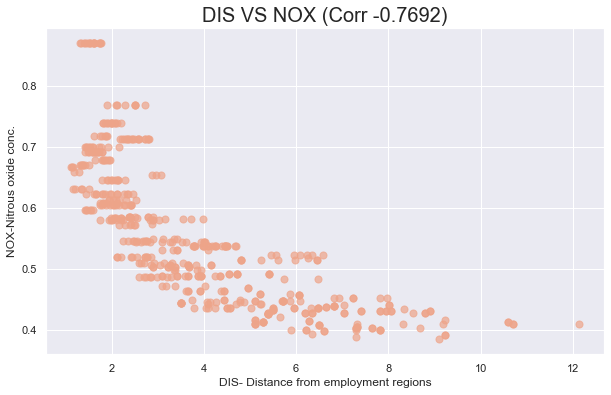

In [67]:
# Visualising the relation between NOX and DIS
# This scatter plot shows a negative corr between this two features
# which seems resaonable as employment regions are more polluted than
# suburbs
nox_dis_cor = data['NOX'].corr(data['DIS'])
plt.figure(figsize = (10,6))
plt.scatter(data['DIS'], data['NOX'], s=50 , alpha=0.7, color = '#eea489')
plt.title(f"DIS VS NOX (Corr {nox_dis_cor:.4f})", fontsize=20)
plt.ylabel('NOX-Nitrous oxide conc.', fontsize=12)
plt.xlabel('DIS- Distance from employment regions', fontsize=12)
plt.show()

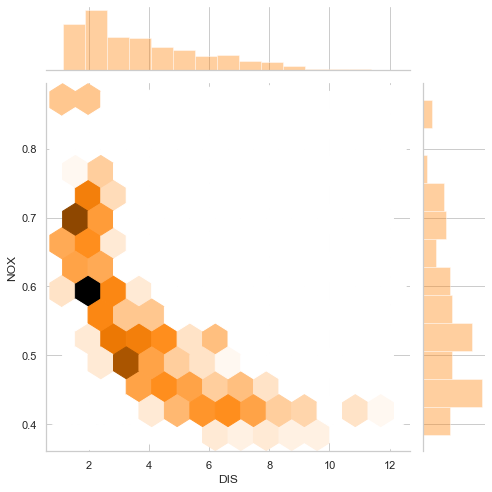

In [98]:
# Shows the correlation between NOX and DIS

sns.set_context("notebook")
sns.set_style("whitegrid")
sns.jointplot(x = data['DIS'], y = data['NOX'], height= 7,kind = 'hex', color = '#ff8811')
plt.show()

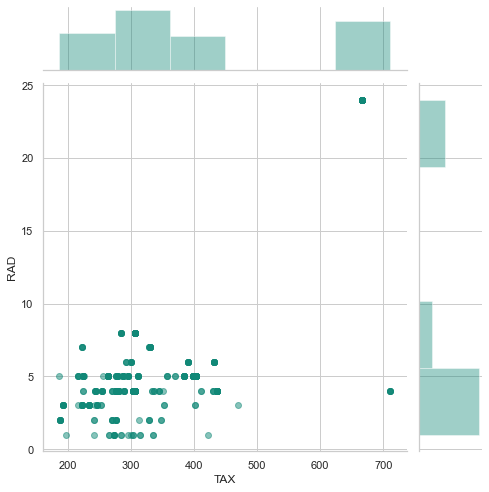

In [106]:
# Correlation between TAX and RAD
# Even though in calculations the correlation between these features is 0.91
# On visualisation we see that, they aren't really related to each other
# the reason for such high correlation could be the outliers on the right side 
# and the data being not so continous.
sns.set_context("notebook")
sns.set_style("whitegrid")
sns.jointplot(x = data['TAX'], y = data['RAD'], height= 7, color = '#118877', joint_kws={'alpha':0.5})
plt.show()

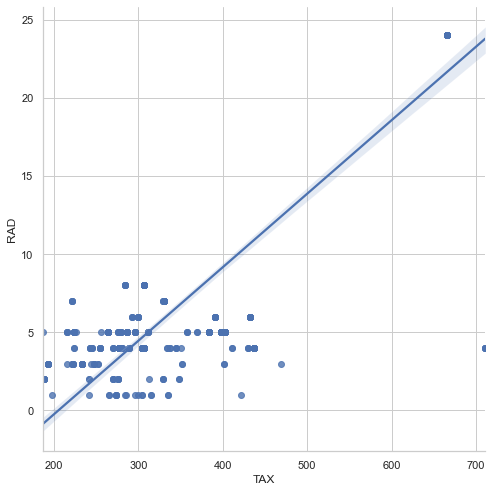

In [110]:
sns.lmplot(x = 'TAX', y='RAD', data=data, height =7)
plt.show()

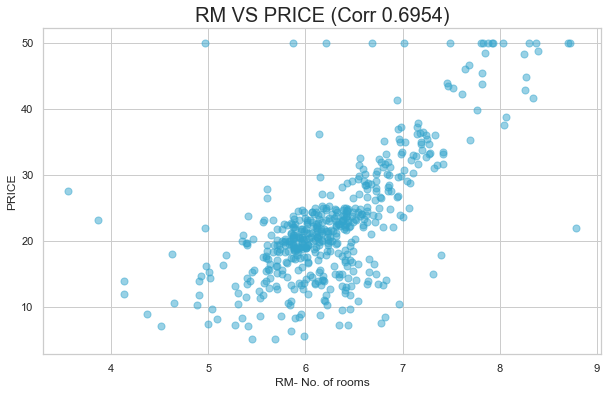

In [114]:
# Visualising the relation between RM and PRICE
# This scatter plot shows a positive corr between this two features
# which seems resaonable as the prices of houses increases with increase in
# number of rooms
rm_price_cor = data['RM'].corr(data['PRICE'])
plt.figure(figsize = (10,6))
plt.scatter(data['RM'], data['PRICE'], s=50 , alpha=0.5, color = '#33a4cc')
plt.title(f"RM VS PRICE (Corr {rm_price_cor:.4f})", fontsize=20)
plt.ylabel('PRICE', fontsize=12)
plt.xlabel('RM- No. of rooms', fontsize=12)
plt.show()

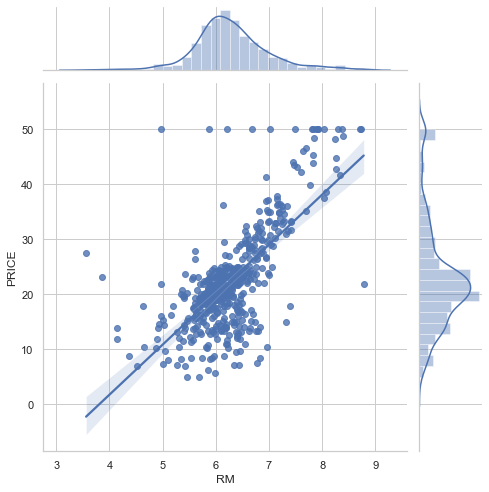

In [122]:
sns.jointplot(x='RM', y='PRICE',kind= 'reg', data= data, height=7)
plt.show()

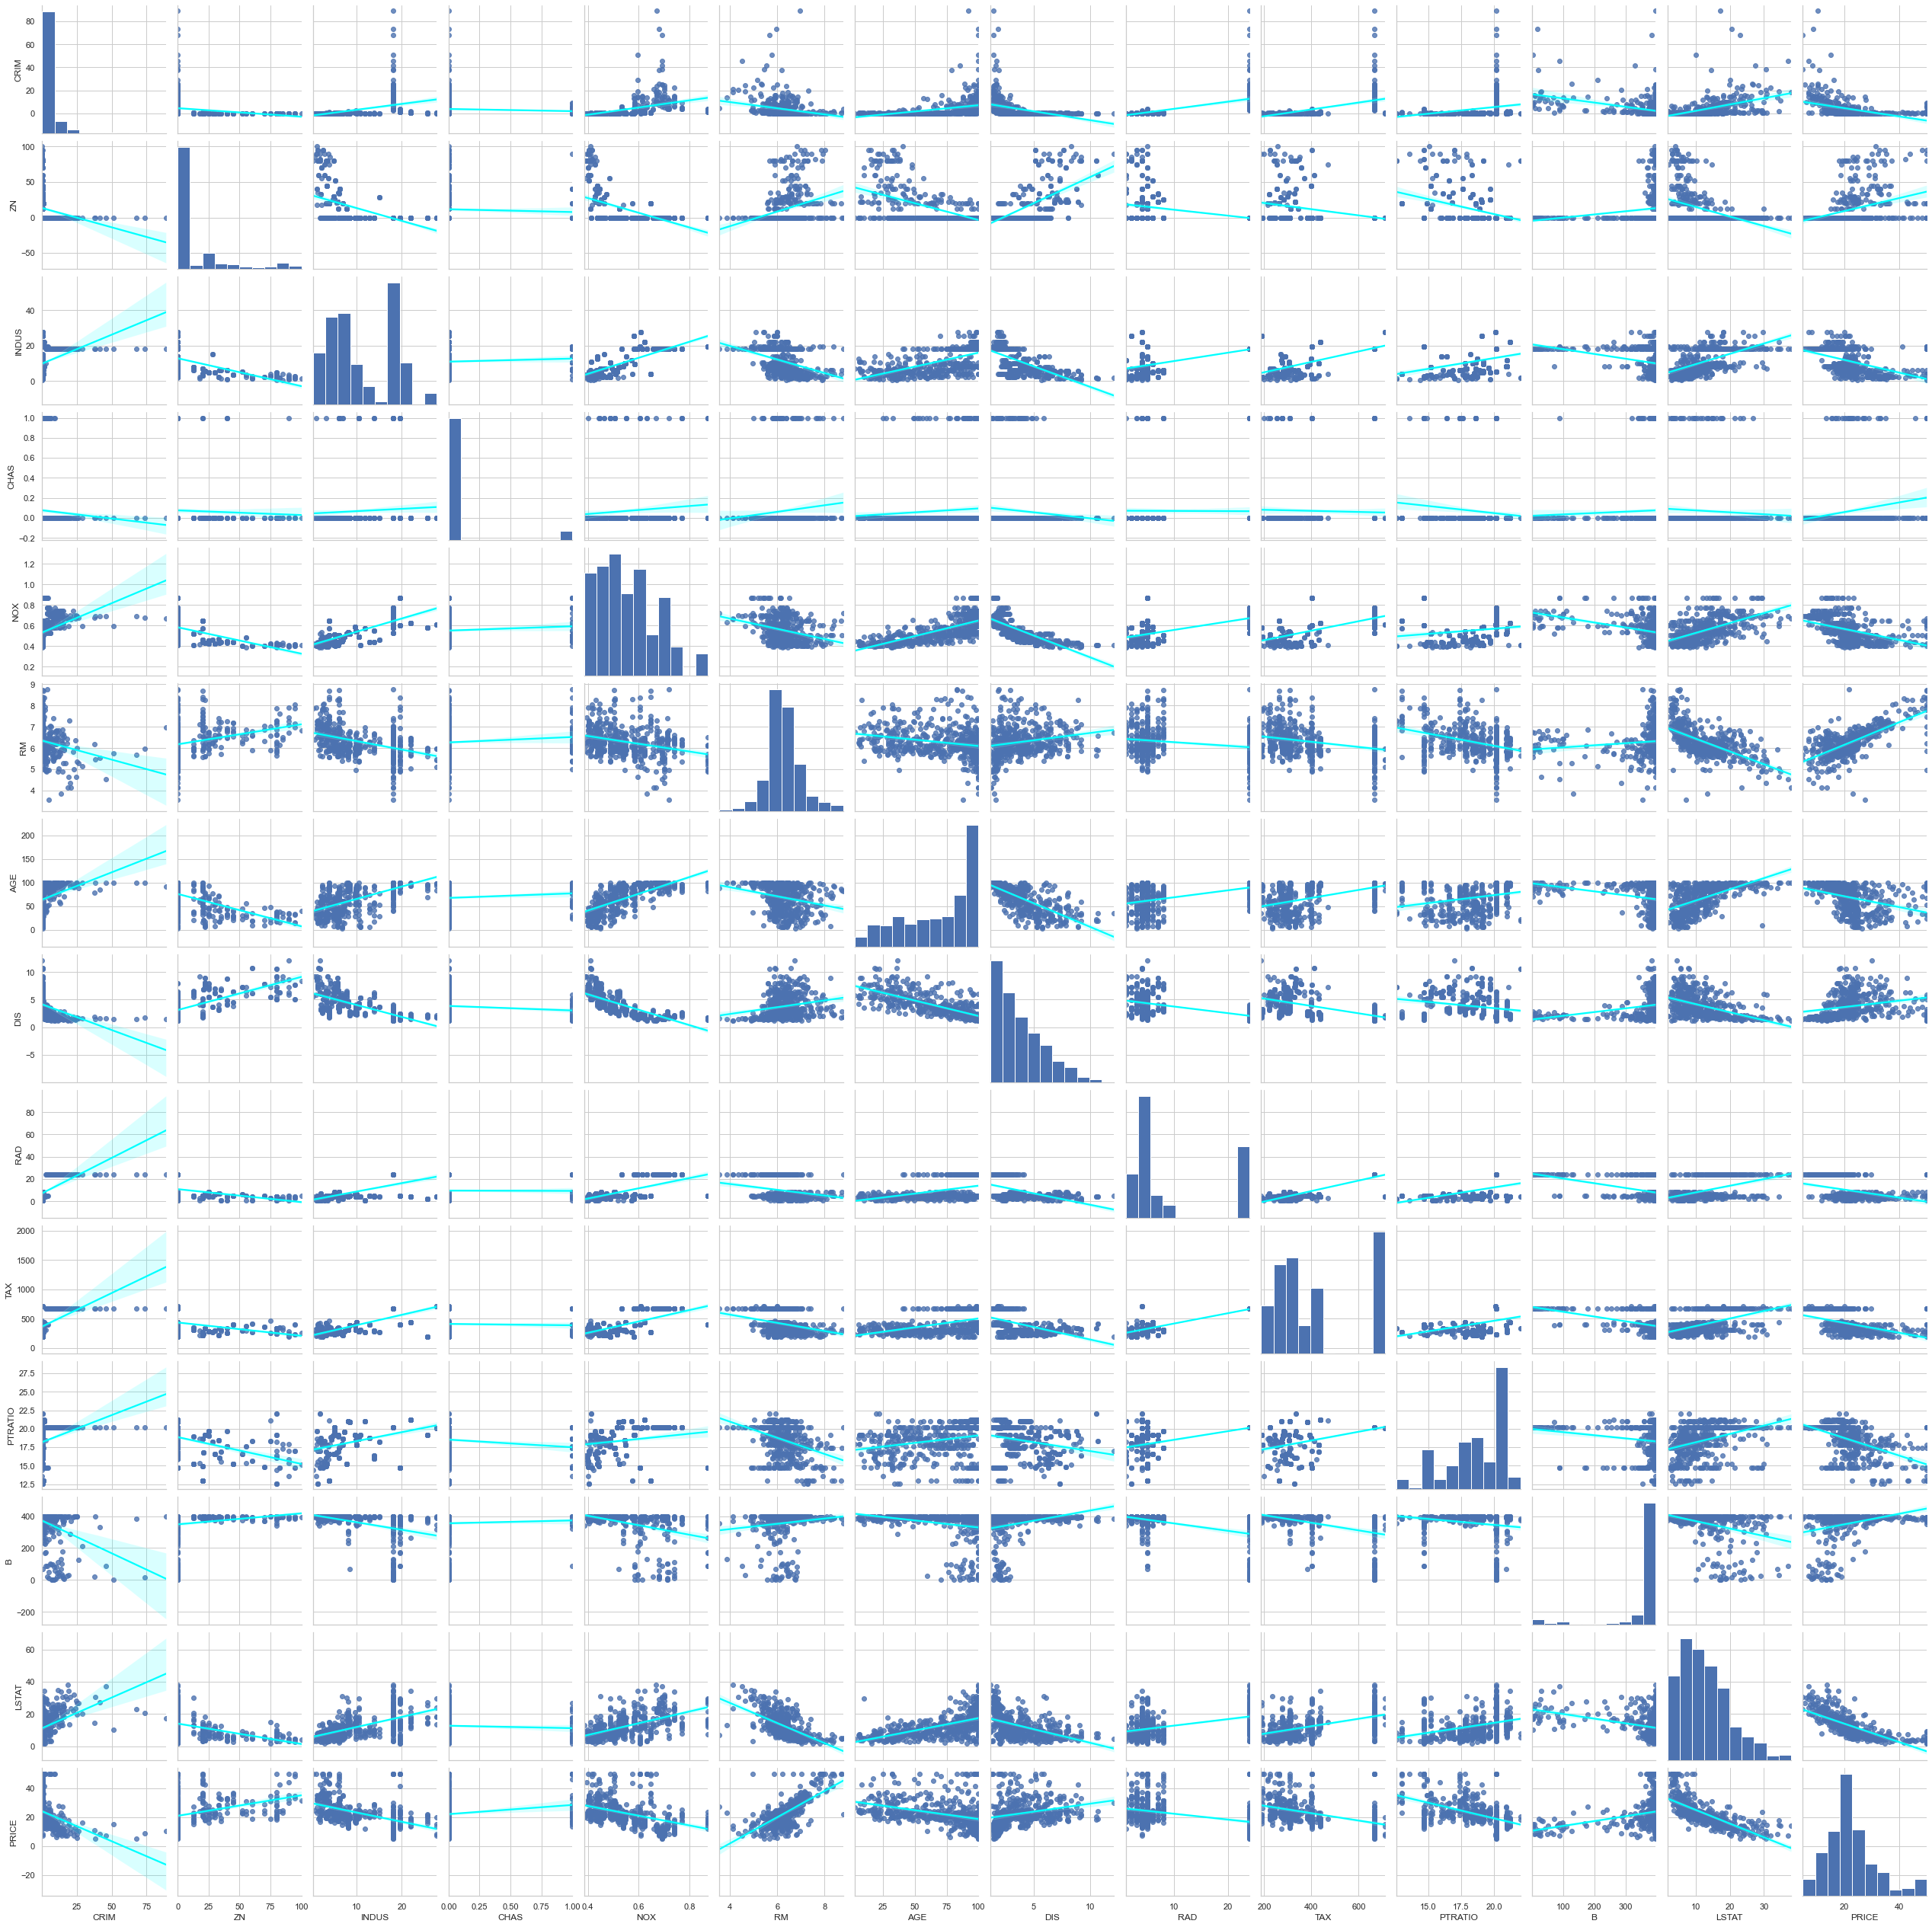

Wall time: 59.1 s


In [127]:
%%time

sns.pairplot(data, kind = 'reg', plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

## Multivariable regression
##### we know that the equation of the linear regression line is  $\hat{y} = \theta_{0} + \theta_{1}\cdot x$
#### Now in multivariable regression think of this as a system of linear equations. Where A is the matix with all the features, X is the matrix with $\theta$ and B is the target matrix.
#### $$ A\cdot X = B$$
#### Why this? Well think about the equation of line once again and imagine how it will look with multiple features. Yeah hard to imagine right? Well Linear Algebra comes to rescue there. Each value in the target is the Linear Combination of all the features in the data.
#### $$ Y = \theta_{0} + x_{1}\cdot\theta_{1} + x_{2}\cdot\theta_{2} + ... + x_{n}\cdot\theta_{n}$$
#### Now in matrix representation looks something like this:
#### $$\begin{bmatrix} t_{1}\\t_{2}\\.\\.\\ t_{m}\end{bmatrix} = \begin{bmatrix}x_{0}&x_{1}&x_{2}&.&.&.&x_{n}\end{bmatrix}\cdot \begin{bmatrix} \theta_{0}\\ \theta_{1}\\.\\.\\ \theta_{n}\end{bmatrix} $$
#### Where each $x_{i}$ is a column matrix of m rows. Now theoretically, we can solve this equation by finding inverse of A and then solving the equation. But there is a better alternative.
#### $$ X = \left(A^{T}\cdot A\right)^{-1}\cdot A^{T}\cdot B $$

[Read More...](https://towardsdatascience.com/linear-regression-cost-function-gradient-descent-normal-equations-1d2a6c878e2c)

## Training & Test Data Split

In [129]:
prices = data['PRICE']   #Separating target
features = data.drop('PRICE', axis=1)  # separating features

In [131]:
# Shuffling and splitting the data
# random_state argument is added to get fixed shuffle.
# If you have the same random_state then the splitting of your 
# data will be same as mine
xTrain, xTest, yTrain, yTest = train_test_split(features, prices, 
                                                test_size=0.2, random_state=10)

# BEHOLD!!

In [136]:
regr = LinearRegression()
regr.fit(xTrain, yTrain)

LinearRegression()

In [137]:
regr.coef_

array([-1.28180656e-01,  6.31981786e-02, -7.57627602e-03,  1.97451452e+00,
       -1.62719890e+01,  3.10845625e+00,  1.62922153e-02, -1.48301360e+00,
        3.03988206e-01, -1.20820710e-02, -8.20305699e-01,  1.14189890e-02,
       -5.81626431e-01])

In [138]:
regr.intercept_

36.53305138282439

In [140]:
#Displaying the results
pd.DataFrame(data=regr.coef_, index =xTrain.columns, columns=["coef"])

,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [141]:
## Printing out the r-squared for training and test datasets
print("Training data r-squared: ", regr.score(xTrain, yTrain))
print("Test data r-squared: ", regr.score(xTest, yTest))

Training data r-squared:  0.750121534530608
Test data r-squared:  0.6709339839115628


# Data Transformations

In [142]:
# The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero. 
# Negative values for the skewness indicate data that are skewed left and positive 
# values for the skewness indicate data that are skewed right. By skewed left, we mean that the left tail
# is long relative to the right tail. Similarly, skewed right means that the right tail is long relative 
# to the left tail. If the data are multi-modal, then this may affect the sign of the skewness.


data['PRICE'].skew()

1.1080984082549072

In [147]:
# positive value of skew tells that the PRICE is right skewed. To remove this
# skewness to some extent we can apply some kind of a transformation. Like taking
# Logarithm, or square Root.
priceLog = np.log(data['PRICE'])
priceLog.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [148]:
priceLog.skew()

-0.33032129530987864

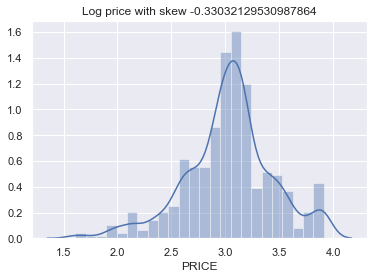

In [149]:
sns.distplot(priceLog)
plt.title(f"Log price with skew {priceLog.skew()}")
plt.show()

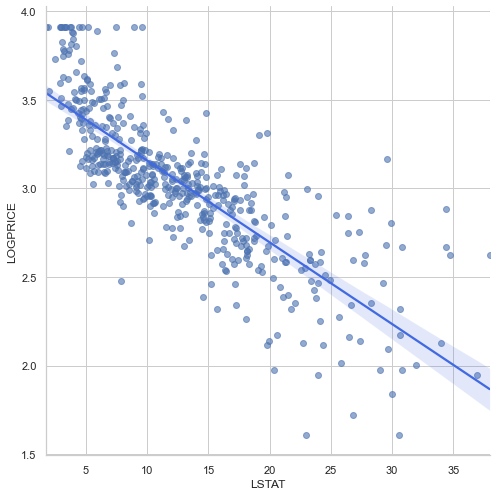

In [153]:
transformData = features
transformData['LOGPRICE'] = priceLog

sns.set_style("whitegrid")
sns.lmplot(x="LSTAT", y="LOGPRICE", data=transformData, height=7, 
           scatter_kws = {'alpha':0.6}, line_kws = {'color':'royalblue'})
plt.show()

## Regression using Log prices

In [156]:
prices = np.log(data['PRICE'])  #Separating target
features = data.drop('PRICE', axis=1)  # separating features

In [157]:
# Shuffling and splitting the data
# random_state argument is added to get fixed shuffle.
# If you have the same random_state then the splitting of your 
# data will be same as mine
xTrain, xTest, yTrain, yTest = train_test_split(features, prices, 
                                                test_size=0.2, random_state=10)

In [158]:
regr2 = LinearRegression()
regr2.fit(xTrain, yTrain)

LinearRegression()

In [159]:
#Displaying the results
pd.DataFrame(data=regr2.coef_, index =xTrain.columns, columns=["coef"])

,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [160]:
## Printing out the r-squared for training and test datasets
print("Training data r-squared: ", regr2.score(xTrain, yTrain))
print("Test data r-squared: ", regr2.score(xTest, yTest))

Training data r-squared:  0.7930234826697583
Test data r-squared:  0.7446922306260724
